# About the dataset
- The "AI-Powered Job Market Insights" dataset offers a realistic view of the modern job market, focusing on AI and automation in various industries.
- It includes 500 unique job listings, allowing researchers and policymakers to explore AI's impact on employment.
- The dataset features includes job titles, industry, company size, location, AI adoption level, automation risk, required skills, annual salary in USD, remote-friendly status, and job growth projection.

## Step1: Import the necessary laibaryes and load the dataset

**Here I imported the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
from sklearn.metrics import mean_squared_error as MSE

**Load the ai job market insights dataset**

In [2]:
df=pd.read_csv('ai_job_market_insights.csv')

## Step2: Exploratory Data Analysis (EDA)

- ### Undersdanding the data

**This code will print the first five rows**

In [3]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


**This code will print the last five rows**

In [4]:
df.tail()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable
499,HR Manager,Entertainment,Medium,Berlin,Medium,High,Project Management,68764.378921,Yes,Decline


In [5]:
df.shape

(500, 10)

- **The dataset has 500 rows and 10 cloumns**

**Let's look at these ten columns**

In [6]:
df.columns

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')

In [7]:
df.dtypes

,0
Job_Title,object
Industry,object
Company_Size,object
Location,object
AI_Adoption_Level,object
Automation_Risk,object
Required_Skills,object
Salary_USD,float64
Remote_Friendly,object
Job_Growth_Projection,object


- **All cloumn types are objects except Salary_USD has float data type.**

**Here I will print a statistical overview on the only one numericl cloumn the dataset has.**

In [8]:
df.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


- **There's 500 rows.**
- **The avrage of the salary is $91,222.39.**

- **The lowest salary is $31,969.53.**

- **The highest salary is $155,209.82.**

 __Here I will check for null values__

In [9]:
df.isnull().sum()

,0
Job_Title,0
Industry,0
Company_Size,0
Location,0
AI_Adoption_Level,0
Automation_Risk,0
Required_Skills,0
Salary_USD,0
Remote_Friendly,0
Job_Growth_Projection,0


__- There are no null values :)__

**let's see the count of unique values of some cloumn**

In [10]:
df['Job_Title'].value_counts()

,count
Job_Title,
Data Scientist,62
HR Manager,57
Cybersecurity Analyst,55
UX Designer,54
AI Researcher,51
Sales Manager,49
Marketing Specialist,48
Operations Manager,44
Software Engineer,41


**The most common job title in the dataset is Data Scientist :)**

In [11]:
df['Industry'].value_counts()

,count
Industry,
Manufacturing,58
Education,57
Technology,56
Finance,53
Telecommunications,53
Energy,49
Entertainment,47
Retail,46
Healthcare,42


**Ten Industry**

- ### Visulazaing the data

### Histogram Plot


__I will use histogram plot To show the distribution of salaries.__

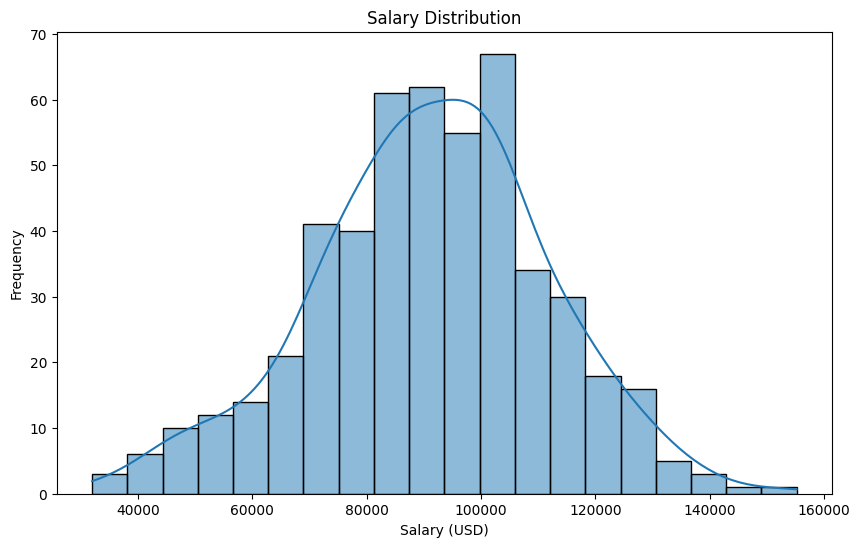

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary_USD'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

### Box Plot

**I will use box plot to detect outliers in salary data.**

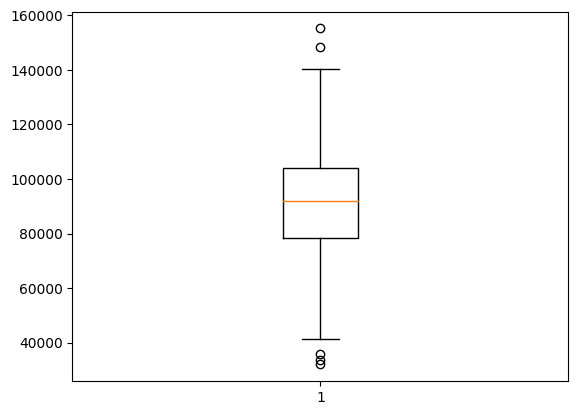

In [13]:
plt.boxplot(df['Salary_USD'])
plt.show()

**Yep! There are outliers in the data. I will handle it in the next section.**

**I will use box plot to compare salary distributions across different industries.**

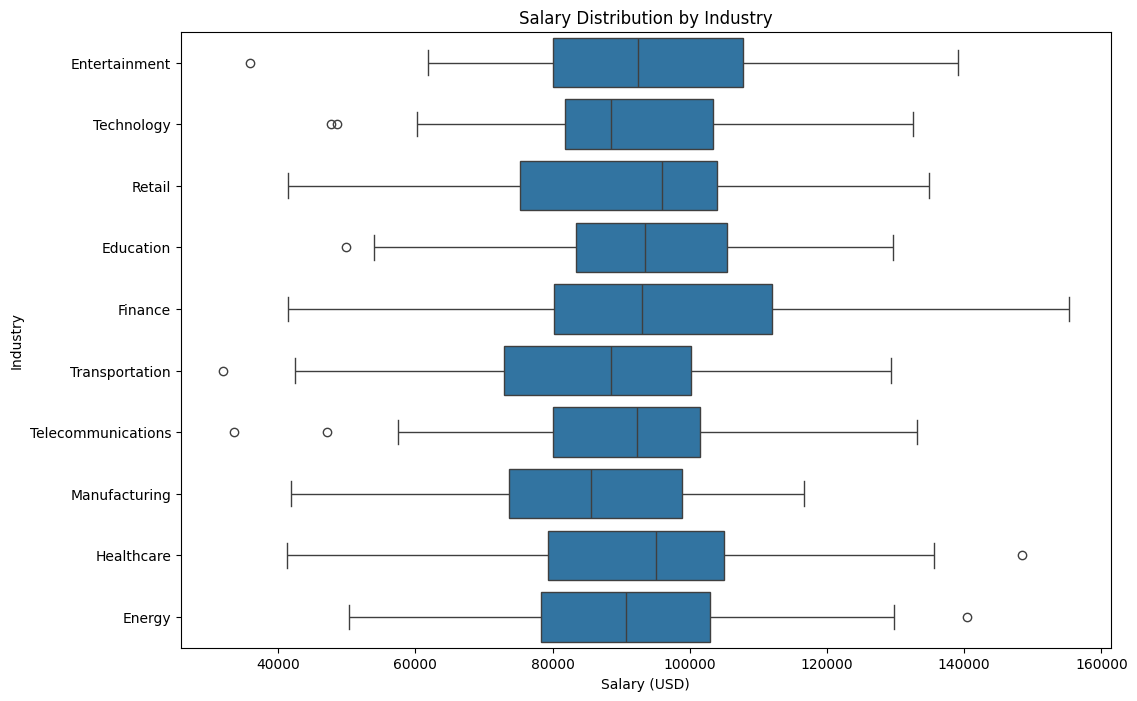

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Salary_USD', y='Industry', data=df)
plt.title('Salary Distribution by Industry')
plt.xlabel('Salary (USD)')
plt.ylabel('Industry')
plt.show()

### Bar Chart

**I will use bar chart to compare average salaries across different job titles.**

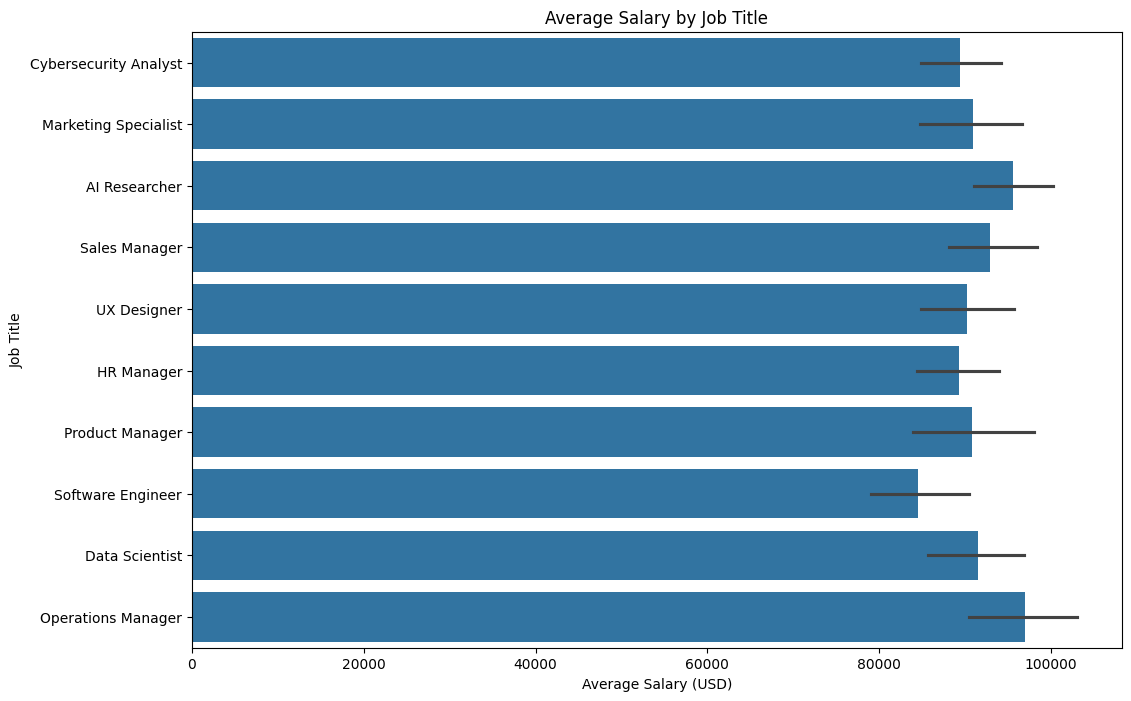

In [15]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Salary_USD', y='Job_Title', data=df, estimator=np.mean)
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.show()

### Pie Chart

**I will use pie chart to show the proportion of remote friendly jobs.**

In [16]:
remote_friendly_counts = df['Remote_Friendly'].value_counts()
remote_friendly_counts

,count
Remote_Friendly,
Yes,251
No,249


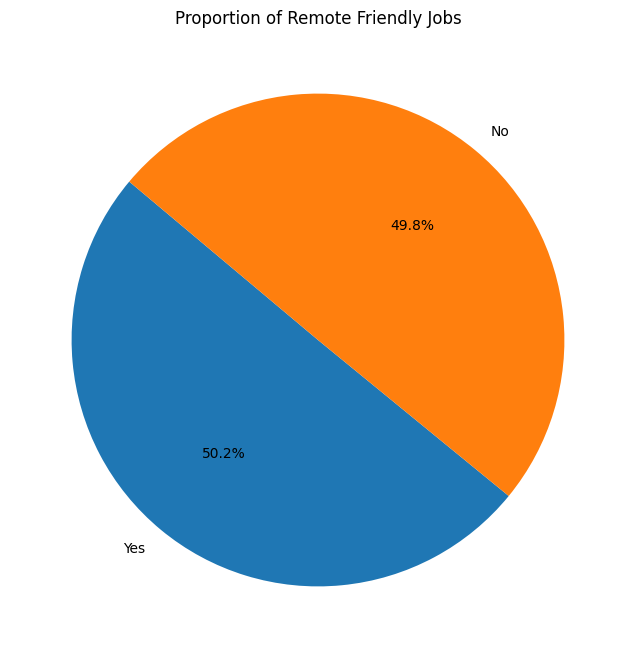

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(remote_friendly_counts, labels=remote_friendly_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Remote Friendly Jobs')
plt.show()

**I will use pie chart to show the proportion of remote Job Growth.**

In [18]:
job_growth_counts=df['Remote_Friendly'].value_counts()
job_growth_counts

,count
Remote_Friendly,
Yes,251
No,249


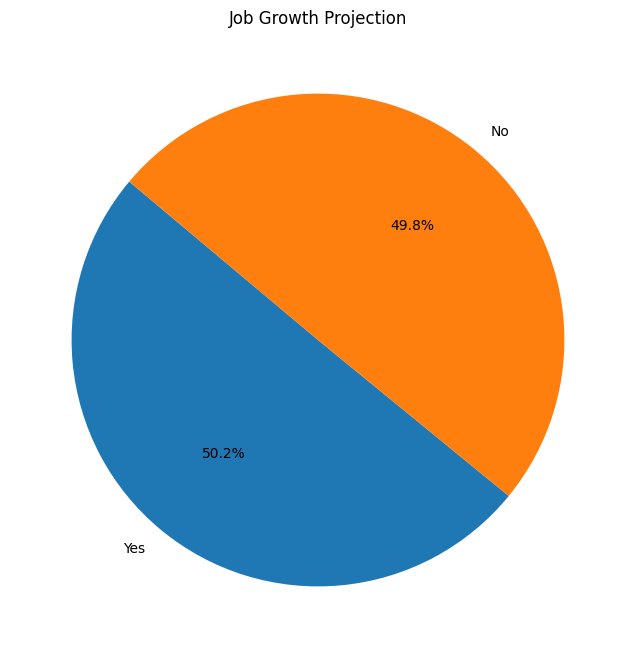

In [19]:
plt.figure(figsize=(8, 8))
plt.pie(job_growth_counts, labels=job_growth_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Job Growth Projection')
plt.show()

### Word Cloud

**I will use word cloud to visualize the most common skills required for the jobs.**

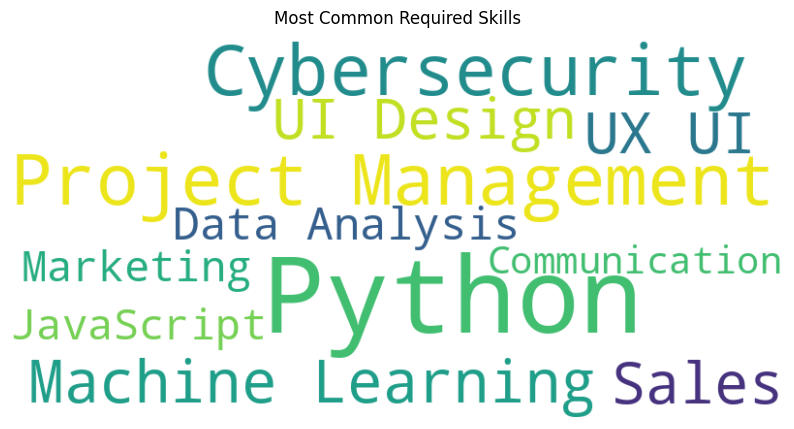

In [20]:
skills = ' '.join(df['Required_Skills'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Required Skills')
plt.show()

### Scatter geo plot

**Using plotly.express to create a scatter geo plot.**

In [21]:
df['Location'].value_counts()

,count
Location,
San Francisco,62
Singapore,54
Sydney,52
Dubai,51
Tokyo,51
New York,49
Berlin,48
London,46
Paris,46


In [22]:
data = {
    'Location': ['San Francisco', 'Singapore', 'Sydney', 'Dubai', 'Tokyo', 'New York', 'Berlin', 'London', 'Paris', 'Toronto'],
    'Count': [62, 54, 52, 51, 51, 49, 48, 46, 46, 41],
    'Latitude': [37.7749, 1.3521, -33.8688, 25.276987, 35.6895, 40.7128, 52.5200, 51.5074, 48.8566, 43.651070],
    'Longitude': [-122.4194, 103.8198, 151.2093, 55.296249, 139.6917, -74.0060, 13.4050, -0.1278, 2.3522, -79.347015]
}

df_location = pd.DataFrame(data)

# Create a scatter geo plot
fig = px.scatter_geo(df_location,
                     lat='Latitude',
                     lon='Longitude',
                     text='Location',
                     size='Count',
                     title='Job Locations and Counts',
                     projection='natural earth')

fig.show()

## Step3: Data Preprocessing

## Data Cleaning
Since there are no null values, I will start by handling the outliers using the IQR method.

Then, I will check for duplicate records

### handling the outliers

Let's handle the outliers we see earlier.

I will use the Interquartile Range (IQR)to handle the outliersis which is a measure of statistical dispersion, It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1):
*   IQR=Q3−Q1

In [23]:
# Declare the first quartile (Q1) and third quartile (Q3)
Q1 = df['Salary_USD'].quantile(0.25)
Q3 = df['Salary_USD'].quantile(0.75)

In [24]:
#Calculate the difference between the third quartile (Q3) and the first quartile (Q1)
IQR = Q3 - Q1

In [25]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [26]:
df_filtered = df[(df['Salary_USD'] >= lower_bound) & (df['Salary_USD'] <= upper_bound)]

In [27]:
print(f"Original dataset size: {df.shape[0]}")
print(f"Filtered dataset size: {df_filtered.shape[0]}")

Original dataset size: 500
Filtered dataset size: 495


Let's look at the box plot after we handled the outliersis

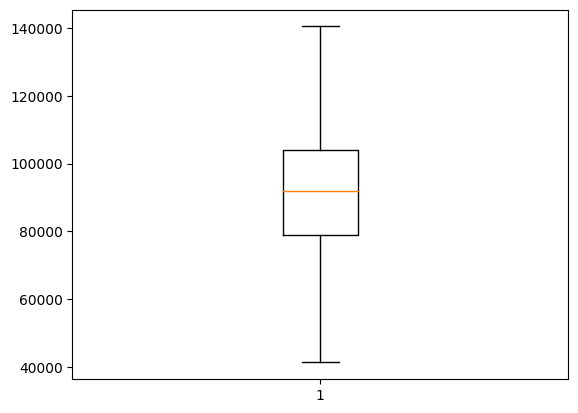

In [28]:
plt.boxplot(df_filtered['Salary_USD'])
plt.show()

**Shine and Clean ;)**

-

### Check for Duplicates

In [29]:
#Check for duplicate rows
df[df.duplicated()].shape[0]

0

**There are no duplicates**

In [30]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


## Step4 :  Data Analysis

### Analysis Of Required Skills

In [31]:
df.groupby('AI_Adoption_Level')['Required_Skills'].apply(lambda x: ', '.join(x)).reset_index()

,AI_Adoption_Level,Required_Skills
0,High,"JavaScript, Cybersecurity, Python, Python, Jav..."
1,Low,"Project Management, JavaScript, Sales, Cyberse..."
2,Medium,"UX/UI Design, Marketing, UX/UI Design, Cyberse..."


<ipython-input-32-87c12eeb4a7f>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-32-87c12eeb4a7f>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-32-87c12eeb4a7f>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




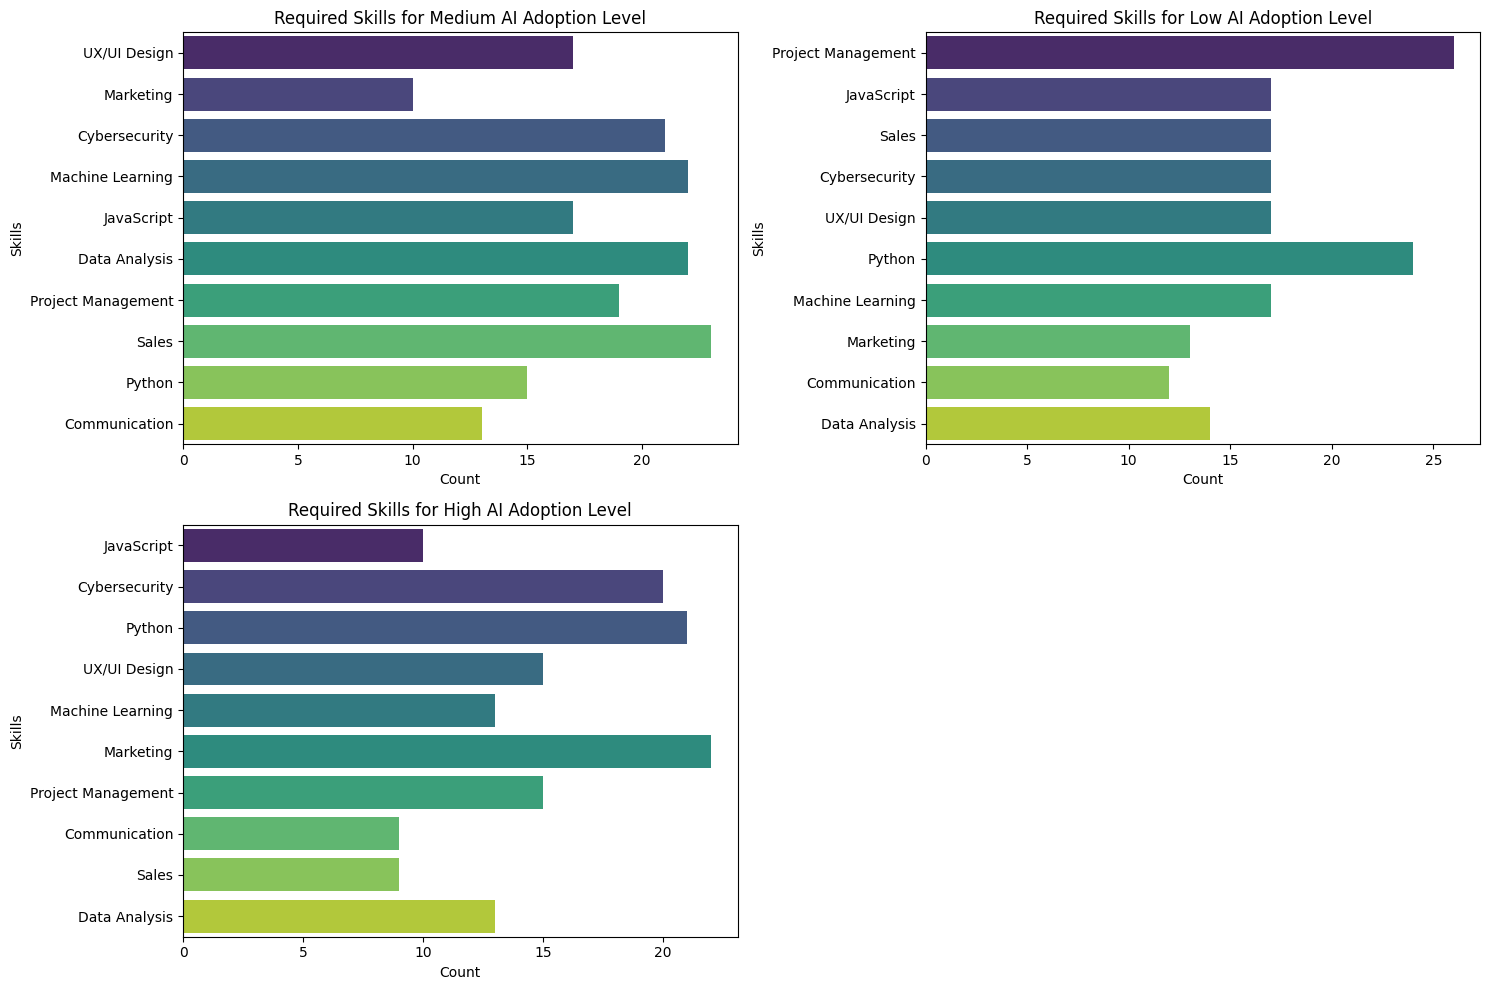

In [32]:
ai_levels = df['AI_Adoption_Level'].unique()
plt.figure(figsize=(15, 10))

for i, level in enumerate(ai_levels, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y='Required_Skills', data=df[df['AI_Adoption_Level'] == level], palette='viridis')
    plt.title(f'Required Skills for {level} AI Adoption Level')
    plt.xlabel('Count')
    plt.ylabel('Skills')

plt.tight_layout()
plt.show()

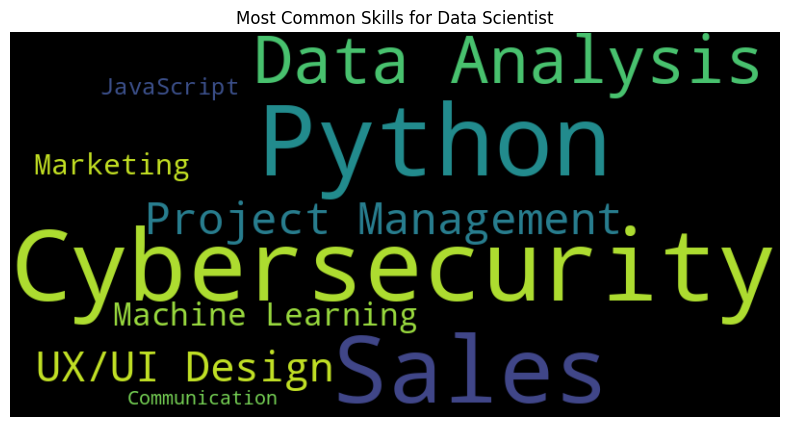

In [33]:
# Count skills for each job title
skills_by_job = df.explode('Required_Skills').groupby('Job_Title')['Required_Skills'].apply(lambda x: Counter(x).most_common())

# Count skills for each industry
skills_by_industry = df.explode('Required_Skills').groupby('Industry')['Required_Skills'].apply(lambda x: Counter(x).most_common())

# Visualize most common skills for a specific job title
job_title = 'Data Scientist'
skills = dict(skills_by_job[job_title])
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(skills)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Most Common Skills for {job_title}')
plt.show()

In [34]:
skills_by_job.reset_index()

,Job_Title,Required_Skills
0,AI Researcher,"[(JavaScript, 9), (Python, 9), (Sales, 7), (Cy..."
1,Cybersecurity Analyst,"[(Cybersecurity, 10), (UX/UI Design, 9), (Mach..."
2,Data Scientist,"[(Cybersecurity, 9), (Python, 9), (Sales, 8), ..."
3,HR Manager,"[(Machine Learning, 10), (Data Analysis, 7), (..."
4,Marketing Specialist,"[(Python, 10), (Marketing, 8), (Sales, 6), (Co..."
5,Operations Manager,"[(UX/UI Design, 6), (Project Management, 5), (..."
6,Product Manager,"[(Machine Learning, 7), (Project Management, 6..."
7,Sales Manager,"[(Data Analysis, 9), (Cybersecurity, 8), (Proj..."
8,Software Engineer,"[(Machine Learning, 6), (Project Management, 5..."
9,UX Designer,"[(Project Management, 14), (Cybersecurity, 8),..."


In [35]:
skills_by_industry.reset_index()

,Industry,Required_Skills
0,Education,"[(Project Management, 10), (Cybersecurity, 9),..."
1,Energy,"[(UX/UI Design, 9), (Data Analysis, 6), (Sales..."
2,Entertainment,"[(Cybersecurity, 8), (Marketing, 7), (JavaScri..."
3,Finance,"[(Python, 9), (Machine Learning, 8), (Cybersec..."
4,Healthcare,"[(Python, 8), (JavaScript, 5), (Data Analysis,..."
5,Manufacturing,"[(Project Management, 8), (Marketing, 8), (Pyt..."
6,Retail,"[(Cybersecurity, 9), (Machine Learning, 6), (P..."
7,Technology,"[(Marketing, 10), (Sales, 9), (UX/UI Design, 8..."
8,Telecommunications,"[(Project Management, 9), (Data Analysis, 7), ..."
9,Transportation,"[(Python, 8), (Sales, 7), (UX/UI Design, 5), (..."


### Risk And Growth Analysis

In [36]:
# Analyze which job titles or industries are at higher risk of automation
automation_risk_by_job = df.groupby('Job_Title')['Automation_Risk'].value_counts().unstack()
automation_risk_by_industry = df.groupby('Industry')['Automation_Risk'].value_counts().unstack()

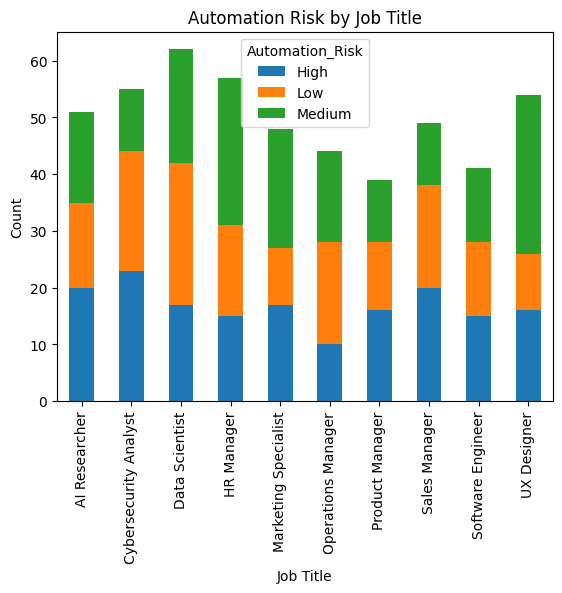

In [37]:
# Visualize automation risk by job title
automation_risk_by_job.plot(kind='bar', stacked=True)
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Automation Risk by Job Title')
plt.show()

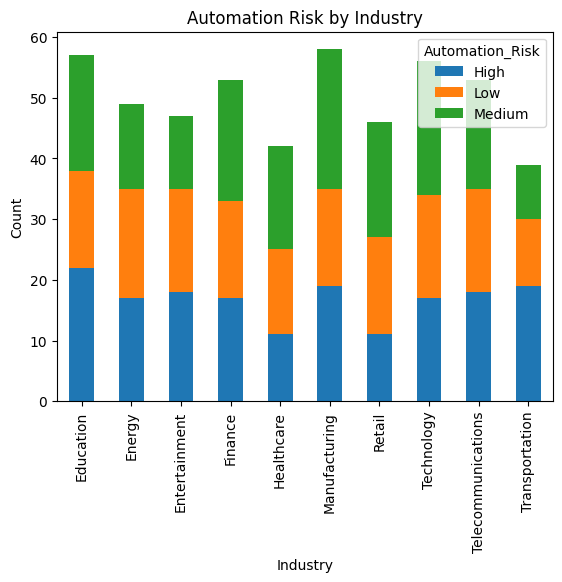

In [38]:
# Visualize automation risk by industry
automation_risk_by_industry.plot(kind='bar', stacked=True)
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Automation Risk by Industry')
plt.show()

In [39]:
# Identify job titles or industries with the highest growth projections
growth_projection_by_job = df.groupby('Job_Title')['Job_Growth_Projection'].value_counts().unstack().fillna(0)
growth_projection_by_industry = df.groupby('Industry')['Job_Growth_Projection'].value_counts().unstack().fillna(0)

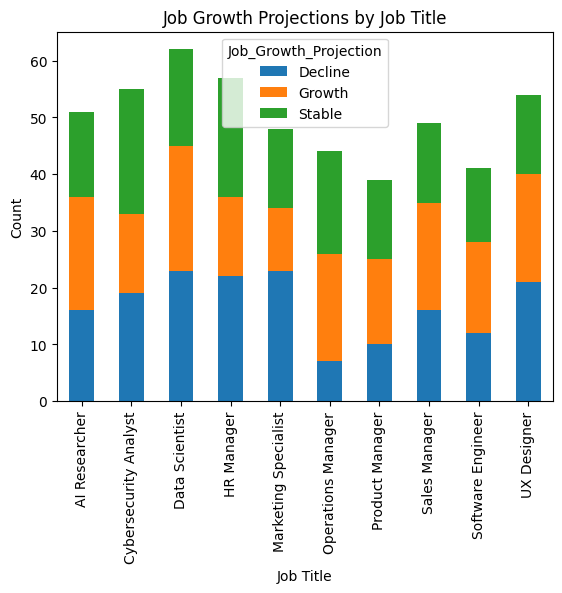

In [40]:
# Visualize job growth projections by job title
growth_projection_by_job.plot(kind='bar', stacked=True)
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Job Growth Projections by Job Title')
plt.show()

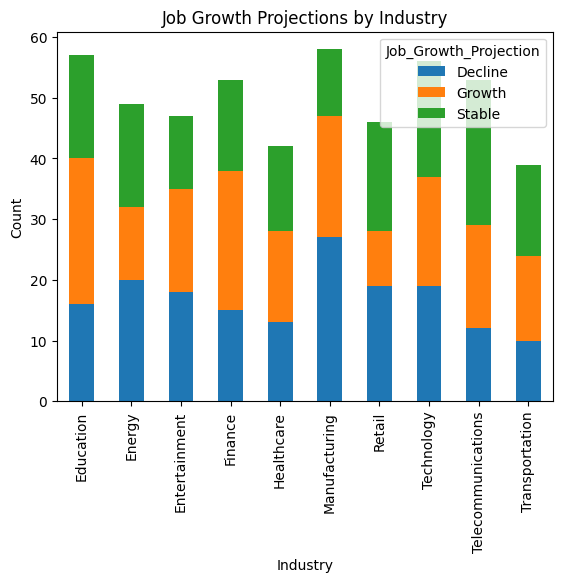

In [41]:
# Visualize job growth projections by industry
growth_projection_by_industry.plot(kind='bar', stacked=True)
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Job Growth Projections by Industry')
plt.show()

### Remote Work Analysis

In [42]:
# Compare salaries between remote-friendly and non-remote-friendly jobs
salary_comparison = df.groupby('Remote_Friendly')['Salary_USD'].mean()

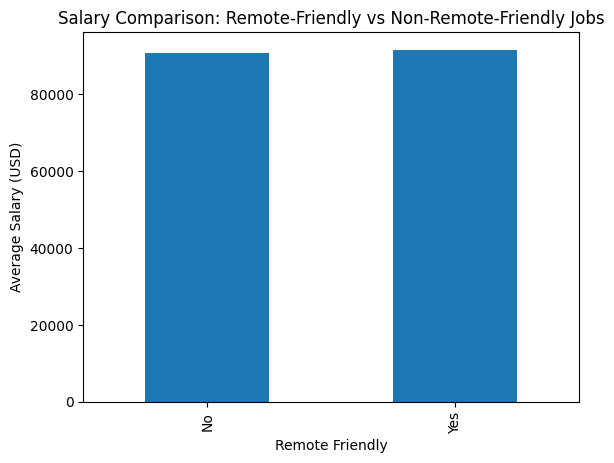

In [43]:
salary_comparison.plot(kind='bar')
plt.xlabel('Remote Friendly')
plt.ylabel('Average Salary (USD)')
plt.title('Salary Comparison: Remote-Friendly vs Non-Remote-Friendly Jobs')
plt.show()

## Step 5: Predictive Analysis Model Building
### Salary Prediction
I will build an XGBRegressor model to predict salary. First, I will do some feature engineering.

### **Feature engineering**

Select the categorical feature that I wnat to use to build the model

In [44]:
features = ['Job_Title','AI_Adoption_Level','Automation_Risk','Required_Skills']

here I create a StandardScaler instance and  use it to scale the salary data

In [45]:
scaler = StandardScaler()
df['Salary_USD'] = scaler.fit_transform(df[['Salary_USD']])

 Convert the categorical variables

In [46]:
ohe=OneHotEncoder()
hot=ohe.fit_transform(df[features])

In [47]:
hot_df=pd.DataFrame(hot.toarray())
hot_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
cold_df=df.select_dtypes(exclude=['object'])
cold_df.head()

,Salary_USD
0,0.984671
1,0.125474
2,0.778561
3,0.088146
4,-0.169376


In [49]:
cold=csr_matrix(cold_df)

In [50]:
final_sparse_matrix=hstack((hot,cold))

In [51]:
final_df=pd.DataFrame(final_sparse_matrix.toarray())
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.984671
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.125474
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.778561
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.088146
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.169376


### Spilt the data to train set and test set

In [52]:
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2)

### Fit the model and make predictionstion

In [54]:
model=XGBRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

 ### Evaluate the model performance using mean squared error

In [55]:
rmse=MSE(y_pred,y_test)**0.5
rmse

1.1940443348089542

### Show the predication

In [56]:
np.round(y_pred)

array([ 1., -1., -0., -1.,  0.,  0.,  1., -1.,  1., -1., -1., -0., -1.,
        0.,  0., -1.,  0.,  1., -0., -1.,  0., -0., -1., -1.,  0.,  1.,
        1., -0.,  1.,  1., -1.,  0.,  1.,  1., -0.,  1., -2.,  2.,  1.,
        1.,  0., -1., -0.,  0.,  1., -0.,  0.,  1., -1.,  1.,  0., -0.,
        0.,  1.,  1., -0.,  1.,  1.,  0.,  1.,  1., -1., -0., -0.,  0.,
        0.,  1.,  1., -0., -0., -1.,  1.,  1., -1.,  0., -0., -0.,  0.,
       -1.,  0., -1., -1.,  0.,  0.,  1., -0.,  1.,  1.,  1., -1., -0.,
       -1.,  0., -0., -1.,  1., -0., -0., -3., -0.,  0., -0.,  0., -1.,
        0.,  0.,  0., -0.,  0., -1.,  0.,  1.,  0.,  0., -1., -1., -0.,
       -1., -0., -0.,  1.,  1., -0., -0., -0.], dtype=float32)

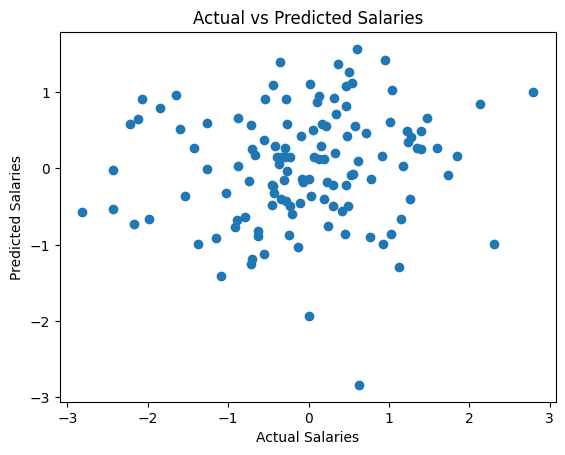

In [57]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Actual vs Predicted Salaries')
plt.show()